In [6]:
from coffea.util import load
import numpy as np
import pandas as pd
var_dict = {}
years = ['2016preVFP', '2016postVFP', '2017', '2018']
for year in years:
    print(f'Processing {year}')
    result = load(f"../results/{year}/makeSys_reduce_125/output_herwig.coffea")
    if isinstance(result,tuple):
        result = result[0]
    for varName in result:
        if 'hist' in varName:
            continue
        else:
            if varName in var_dict:
                var_dict[varName] = np.append(var_dict[varName], result[varName].value, axis=0)
            else:
                var_dict[varName] = result[varName].value
df = pd.DataFrame(var_dict)

Processing 2016preVFP
Processing 2016postVFP
Processing 2017
Processing 2018


In [70]:
df_herwig, df_vbf = df[(df['isVBFcat']==0)&(df['isHerwig']==1)], df[(df['isVBFcat']==0)&(df['isVBF']==1)]
catcatcat = 'GG cat'

In [67]:
df_herwig, df_vbf = df[(df['isVBFcat']==1)&(df['isHerwig']==1)], df[(df['isVBFcat']==1)&(df['isVBF']==1)]
catcatcat = 'VBF cat'

In [47]:
from coffea import hist
binning = 50
h = hist.Hist('Events', hist.Bin('MVA', 'BDT Discriminator', binning, 0, 1), hist.Cat("sample", "sample"))
h.fill(MVA=df_vbf['mva'].to_numpy(), sample='Pythia (Dipole Recoil)', weight=df_vbf['weight'].to_numpy())
h.fill(MVA=df_herwig['mva'].to_numpy(), sample='Herwig (Angular Shower)', weight=df_herwig['weight'].to_numpy())

/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:423: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:435: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom ** 2) - rsumw
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:452: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom ** 2)


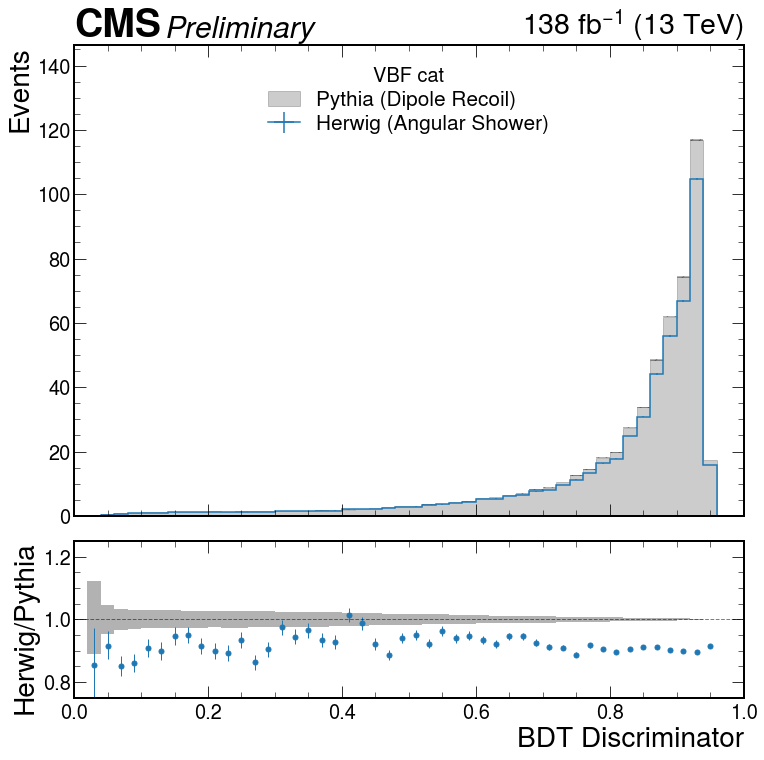

In [48]:
import mplhep
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use(mplhep.style.CMS)
plt.rcParams.update({
    'font.size': 30,
    'axes.titlesize': 24,
    'axes.labelsize': 28,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.title_fontsize': 20
})

#For ratio plots
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(12,12),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)

fig.subplots_adjust(hspace=.08)

# scales = {
#             '$m_{H}=125$GeV': binning/np.sum(data_125['weight'].to_numpy()),
#             '$m_{H}=120$GeV': binning/np.sum(data_120['weight'].to_numpy()),
#             '$m_{H}=130$GeV': binning/np.sum(data_130['weight'].to_numpy()),
# }

error_opts = {
    'label': '',
    'hatch': '///',
    'facecolor': 'k',
    'alpha': 0.3,
    'edgecolor': (0,0,0,.5),
    'linewidth': 0
}

hist.plot1d(
    h[:,'Pythia (Dipole Recoil)'],
    ax=ax,
    overlay='sample',
    stack=True,
    clear=False,
    fill_opts={'edgecolor': (0,0,0,0.3), 'alpha': 0.2, 'facecolor': 'k'},
    error_opts=error_opts,
)

from cycler import cycler
colors = ['#1f78b4','#33a02c']
ax.set_prop_cycle(cycler(color=colors))

hist.plot1d(h[:,['Herwig (Angular Shower)']], ax=ax, clear=False)
ax.set_xlabel(None)
ax.set_ylim(0, max(h.values()[('Pythia (Dipole Recoil)',)]*1.25))

leg = ax.legend(fontsize='x-small', labelspacing=0.25, ncol=1, loc=9, title=catcatcat)

data_err_opts = {
            'linestyle': 'none',
            'marker': '.',
            'markersize': 10.,
            'color': '#1f78b4',
            'elinewidth': 1,
        }


hist.plotratio(
    num=h[:,'Herwig (Angular Shower)'].sum('sample'),
    denom=h[:,'Pythia (Dipole Recoil)'].sum('sample'),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num',
    clear=False
)

rax.set_xlim(0, 1)
rax.set_ylim(0.75, 1.25)
rax.set_ylabel("Herwig/Pythia", loc='center')

lumi = mplhep.cms.label(ax=ax, lumi=138, label="Preliminary", data=1)

In [73]:
df_herwig, df_vbf = df[(df['isVBFcat']==0)&(df['isHerwig']==1)&(df['mva']<0.49)], df[(df['isVBFcat']==0)&(df['isVBF']==1)&(df['mva']<0.49)]
catcatcat = 'GG cat'

In [74]:
from coffea import hist
binning = 25
h = hist.Hist('A.U.', hist.Bin('MVA', '$m_{e\mu}$', binning, 110, 135), hist.Cat("sample", "sample"))
h.fill(MVA=df_vbf['e_m_Mass'].to_numpy(), sample='Pythia (Dipole Recoil)', weight=df_vbf['weight'].to_numpy())
h.fill(MVA=df_herwig['e_m_Mass'].to_numpy(), sample='Herwig (Angular Shower)', weight=df_herwig['weight'].to_numpy())

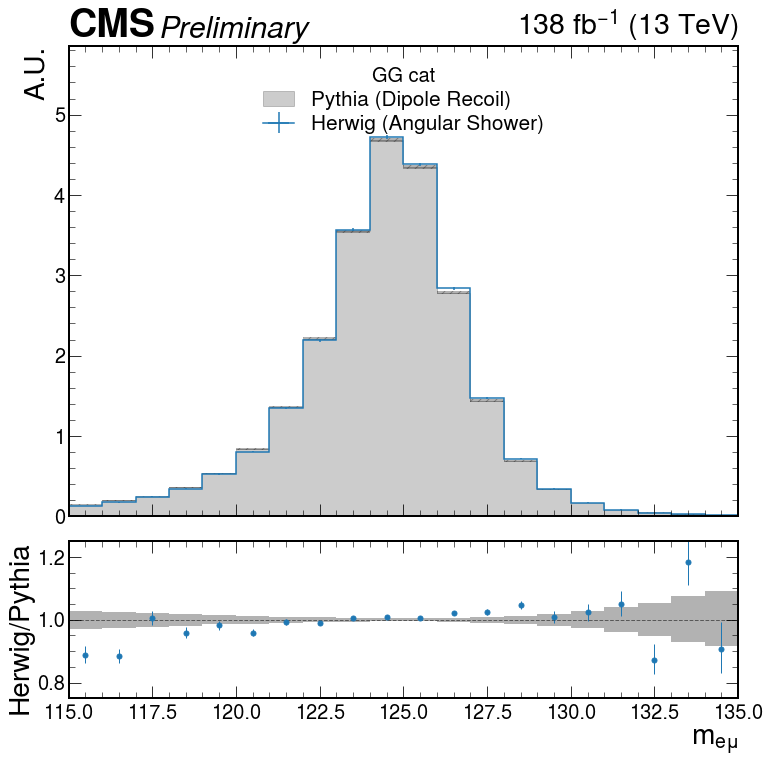

In [75]:
import mplhep
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use(mplhep.style.CMS)
plt.rcParams.update({
    'font.size': 30,
    'axes.titlesize': 24,
    'axes.labelsize': 28,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.title_fontsize': 20
})

#For ratio plots
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(12,12),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)

fig.subplots_adjust(hspace=.08)

scales = {
            'Pythia (Dipole Recoil)': binning/np.sum(df_vbf['weight'].to_numpy()),
            'Herwig (Angular Shower)': binning/np.sum(df_herwig['weight'].to_numpy()),
}

h.scale(scales, axis='sample')

error_opts = {
    'label': '',
    'hatch': '///',
    'facecolor': 'k',
    'alpha': 0.3,
    'edgecolor': (0,0,0,.5),
    'linewidth': 0
}

hist.plot1d(
    h[:,'Pythia (Dipole Recoil)'],
    ax=ax,
    overlay='sample',
    stack=True,
    clear=False,
    fill_opts={'edgecolor': (0,0,0,0.3), 'alpha': 0.2, 'facecolor': 'k'},
    error_opts=error_opts,
)

from cycler import cycler
colors = ['#1f78b4','#33a02c']
ax.set_prop_cycle(cycler(color=colors))

hist.plot1d(h[:,['Herwig (Angular Shower)']], ax=ax, clear=False)
ax.set_xlabel(None)
ax.set_ylim(0, max(h.values()[('Pythia (Dipole Recoil)',)]*1.25))

leg = ax.legend(fontsize='x-small', labelspacing=0.25, ncol=1, loc=9, title=catcatcat)

data_err_opts = {
            'linestyle': 'none',
            'marker': '.',
            'markersize': 10.,
            'color': '#1f78b4',
            'elinewidth': 1,
        }


hist.plotratio(
    num=h[:,'Herwig (Angular Shower)'].sum('sample'),
    denom=h[:,'Pythia (Dipole Recoil)'].sum('sample'),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num',
    clear=False
)

rax.set_xlim(115, 135)
rax.set_ylim(0.75, 1.25)
rax.set_ylabel("Herwig/Pythia", loc='center')

lumi = mplhep.cms.label(ax=ax, lumi=138, label="Preliminary", data=1)